In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./part1.csv")

/var/tmp/ipykernel_1009831/403134354.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./part1.csv")


In [3]:
df.columns

Index(['id', 'Casos', 'campana', 'extra_crea', 'provincia', 'departamento',
       'localidad', 'establecimiento', 'lote', 'tenencia', 'cultivo',
       'subgrupo', 'primera_segunda', 'temprano_tardio', 'sup_sembrada',
       'sup_cosechada', 'destino', 'rendimiento_sup_cosechada', 'produccion',
       'antecesor', 'semillero', 'genetica', 'version_biotecnologica', 'ciclo',
       'fecha_siembra', 'decanato_fecha_siembra', 'densidad_sem_m2',
       'densidad_sem_ha', 'densidad_kg_ha', 'poblacion_pl_ha',
       'distancia_hileras', 'sistema_siembra', 'sistema_labranza', 'resiembra',
       'causa_resiembra', 'fecha_cosecha', 'humedad_cosecha', 'materia_grasa',
       'rendimiento_neto_girasol', 'proteina', 'gluten', 'peso_hectolitrico',
       'Peso_1000', 'agua_inicio', 'profundidad_medicion_au',
       'influencia_napa', 'profundidad_napa_siembra', 'riego', 'sistema_riego',
       'lamina_riego', 'calidad_ambiente', 'clasificacion_ambiente_regional',
       'capacidad_uso', 'tipo_suel

In [87]:
from pandas_profiling import ProfileReport


profile = ProfileReport(df, minimal=True)
profile.to_file(output_file="Profiling_report.html")

TypeCheckError: argument "config_file" (None) did not match any element in the union:
  pathlib.Path: is not an instance of pathlib.Path
  str: is not an instance of str

In [4]:
cols = list(df.columns)
mas80 = []
menos80 = []
for col in cols:
    if (df[col].isna().sum() / len(df) > 0.80):
        mas80.append(col)
    else:
        menos80.append(col)

print(f"Cantidad de columnas con mas de 80% de nulls {len(mas80)}")
print(f"Cantidad de columnas con menos de 80% de nulls {len(menos80)}")

Cantidad de columnas con mas de 80% de nulls 22
Cantidad de columnas con menos de 80% de nulls 75


In [5]:
cols = list(df.columns)
mas50 = []
menos50 = []
for col in cols:
    if (df[col].isna().sum() / len(df) > 0.50):
        mas50.append(col)
    else:
        menos50.append(col)

print(f"Cantidad de columnas con mas de 50% de nulls {len(mas50)}")
print(f"Cantidad de columnas con menos de 50% de nulls {len(menos50)}")

Cantidad de columnas con mas de 50% de nulls 50
Cantidad de columnas con menos de 50% de nulls 47


In [8]:
menos50

['id',
 'Casos',
 'extra_crea',
 'provincia',
 'departamento',
 'localidad',
 'establecimiento',
 'lote',
 'tenencia',
 'cultivo',
 'subgrupo',
 'primera_segunda',
 'sup_sembrada',
 'sup_cosechada',
 'destino',
 'rendimiento_sup_cosechada',
 'produccion',
 'antecesor',
 'semillero',
 'genetica',
 'version_biotecnologica',
 'fecha_siembra',
 'decanato_fecha_siembra',
 'densidad_sem_m2',
 'densidad_sem_ha',
 'distancia_hileras',
 'sistema_siembra',
 'sistema_labranza',
 'resiembra',
 'fecha_cosecha',
 'influencia_napa',
 'riego',
 'calidad_ambiente',
 'clasificacion_ambiente_regional',
 'materia_organica_porc',
 'ph',
 'fosforo_0_20',
 'nitrogeno_no3_0_20',
 'pp_sep',
 'pp_oct',
 'pp_nov',
 'pp_dic',
 'pp_ene',
 'pp_feb',
 'pp_mar',
 'pp_campana',
 'fertilizacion']

In [9]:
n_df = df[menos80]

In [10]:
n_df.columns

Index(['id', 'Casos', 'extra_crea', 'provincia', 'departamento', 'localidad',
       'establecimiento', 'lote', 'tenencia', 'cultivo', 'subgrupo',
       'primera_segunda', 'temprano_tardio', 'sup_sembrada', 'sup_cosechada',
       'destino', 'rendimiento_sup_cosechada', 'produccion', 'antecesor',
       'semillero', 'genetica', 'version_biotecnologica', 'ciclo',
       'fecha_siembra', 'decanato_fecha_siembra', 'densidad_sem_m2',
       'densidad_sem_ha', 'densidad_kg_ha', 'poblacion_pl_ha',
       'distancia_hileras', 'sistema_siembra', 'sistema_labranza', 'resiembra',
       'fecha_cosecha', 'influencia_napa', 'riego', 'calidad_ambiente',
       'clasificacion_ambiente_regional', 'capacidad_uso', 'sistematizado',
       'ambiente_salino', 'nivel_informacion', 'arena', 'limo', 'arcilla',
       'materia_organica_porc', 'ph', 'azufre_ppm', 'fosforo_0_20',
       'nitrogeno_no3_0_20', 'nitrogeno_no3_20_40', 'nitrogeno_no3_40_60',
       'pp_abr', 'pp_may', 'pp_jun', 'pp_jul', 'pp_ago',

In [11]:
precip_columns = ['pp_abr', 'pp_may', 'pp_jun', 'pp_jul', 'pp_ago', 'pp_sep', 
                  'pp_oct', 'pp_nov', 'pp_dic', 'pp_ene', 'pp_feb', 'pp_mar', 
                  'pp_abr_2', 'pp_may_2', 'pp_jun_2', 'pp_jul_2', 'pp_ago_2', 
                  'pp_sep_2', 'pp_oct_2', 'pp_nov_2', 'pp_dic_2']

# Create the new variable and calculate the sum
n_df['pp'] = n_df[precip_columns].sum(axis=1)
n_df.drop(columns=precip_columns, inplace=True)

/var/tmp/ipykernel_1009831/3316525219.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n_df['pp'] = n_df[precip_columns].sum(axis=1)


In [12]:
n_df.drop(columns=['establecimiento', 'lote'], inplace=True)

/var/tmp/ipykernel_1009831/420674750.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n_df.drop(columns=['establecimiento', 'lote'], inplace=True)


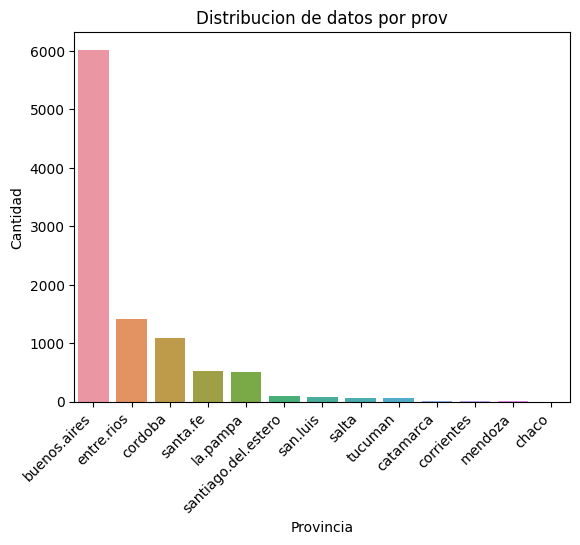

In [16]:
#extra polar para todos los datos, tambien ver cuantos datos tenemos por variable target

j = n_df.groupby(["provincia"])["id"].count()
j = j.reset_index().sort_values("id", ascending = False)
j


plt.xticks(rotation=45, ha='right')  

sns.barplot(x=j["provincia"], y=j["id"])

# Add labels and title
plt.xlabel('Provincia')
plt.ylabel('Cantidad')
plt.title('Distribucion de datos por prov')

# Show plot
plt.show()


In [17]:
cultivo_ten_prov = n_df.groupby(["provincia", "tenencia", "cultivo"])["id"].count()
cultivo_ten_prov = cultivo_ten_prov.reset_index().sort_values("id", ascending  = False)
cultivo_ten_prov = cultivo_ten_prov.reset_index().rename(columns={"id": "cuenta"})

cultivo_ten_prov 

,index,provincia,tenencia,cultivo,cuenta
0,24,buenos.aires,propio,soja,1392
1,26,buenos.aires,propio,trigo,1388
2,22,buenos.aires,propio,maiz,1357
3,19,buenos.aires,propio,cebada,431
4,21,buenos.aires,propio,girasol,430
...,...,...,...,...,...
139,103,salta,propio,poroto,1
140,102,salta,propio,maiz,1
141,78,entre.rios,propio,vicia,1
142,82,la.pampa,arrendado,centeno,1


In [18]:
ten_subgr = n_df.groupby(["tenencia", "subgrupo"])["id"].count()
ten_subgr = ten_subgr.reset_index().sort_values("id", ascending  = False)
ten_subgr = ten_subgr.reset_index().rename(columns={"id": "cuenta"})

ten_subgr 

,index,tenencia,subgrupo,cuenta
0,47,propio,tradicional,2558
1,44,propio,pan,2000
2,43,propio,ogm,1669
3,24,arrendado,tradicional,940
4,20,arrendado,pan,926
5,18,arrendado,ogm,461
6,33,propio,cervecera,368
7,9,arrendado,cervecera,170
8,29,propio,alto oleico,144
9,37,propio,forrajera,96


In [82]:

#buscar relaciones
n_df.columns

Index(['id', 'Casos', 'extra_crea', 'provincia', 'departamento', 'localidad',
       'tenencia', 'cultivo', 'subgrupo', 'primera_segunda', 'temprano_tardio',
       'sup_sembrada', 'sup_cosechada', 'destino', 'rendimiento_sup_cosechada',
       'produccion', 'antecesor', 'semillero', 'genetica',
       'version_biotecnologica', 'ciclo', 'fecha_siembra',
       'decanato_fecha_siembra', 'densidad_sem_m2', 'densidad_sem_ha',
       'densidad_kg_ha', 'poblacion_pl_ha', 'distancia_hileras',
       'sistema_siembra', 'sistema_labranza', 'resiembra', 'fecha_cosecha',
       'influencia_napa', 'riego', 'calidad_ambiente',
       'clasificacion_ambiente_regional', 'capacidad_uso', 'sistematizado',
       'ambiente_salino', 'nivel_informacion', 'arena', 'limo', 'arcilla',
       'materia_organica_porc', 'ph', 'azufre_ppm', 'fosforo_0_20',
       'nitrogeno_no3_0_20', 'nitrogeno_no3_20_40', 'nitrogeno_no3_40_60',
       'pp_campana', 'fertilizacion', 'pp'],
      dtype='object')

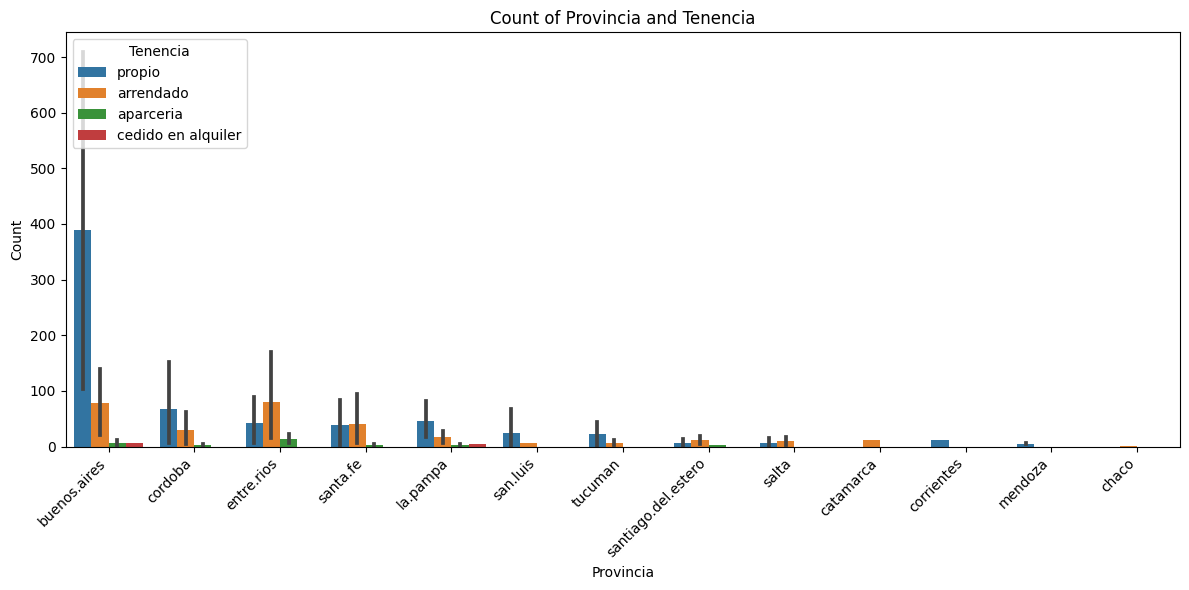

In [85]:
tenencia_prov = n_df.groupby(["provincia", "tenencia"])["id"].count()
tenencia_prov = tenencia_prov.reset_index().sort_values("id", ascending  = False)
tenencia_prov = cultivo_ten_prov.reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='provincia', y='cuenta', hue='tenencia', data=tenencia_prov)

# Set labels and title
plt.xlabel('Provincia')
plt.ylabel('Count')
plt.title('Count of Provincia and Tenencia')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show legend
plt.legend(title='Tenencia')

# Show plot
plt.tight_layout()
plt.show()

In [ ]:
cultivo_prov = n_df.groupby(["provincia", "cultivo"])["id"].count()
cultivo_prov_sorted = cultivo_prov.reset_index().sort_values(["provincia", "id"], ascending  = False)

#renombrar el id

def top_5_by_province(df):
    return df.groupby("provincia").head(3)

cultivo_prov_t5 = cultivo_prov_sorted.groupby("provincia").apply(top_5_by_province)

cultivo_prov_t5.reset_index(drop=True, inplace=True)

plt.figure(figsize=(12, 6))
sns.barplot(x='provincia', y='id', hue='cultivo', data=cultivo_prov_t5)

# Set labels and title
plt.xlabel('Provincia')
plt.ylabel('Count')
plt.title('Count of Provincia and Tenencia')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show legend
plt.legend(title='cultivo')

# Show plot
plt.tight_layout()
plt.show()

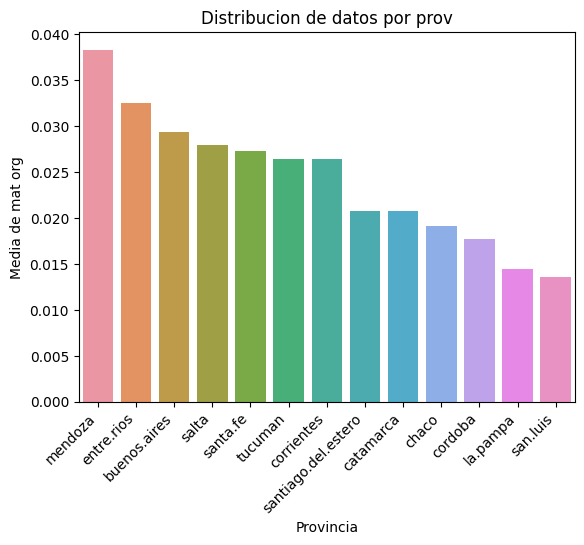

In [21]:
mat_org_prov = n_df.groupby(["provincia"])["materia_organica_porc"].mean()
mat_org_prov = mat_org_prov.reset_index().sort_values("materia_organica_porc", ascending  = False)
mat_org_prov

plt.xticks(rotation=45, ha='right')  

sns.barplot(x="provincia", y="materia_organica_porc", data = mat_org_prov)

# Add labels and title
plt.xlabel('Provincia')
plt.ylabel('Media de mat org')
plt.title('Distribucion de datos por prov')

# Show plot
plt.show()

In [22]:
cor = n_df.select_dtypes(include='number').corr()
cor["materia_organica_porc"]

id                          -0.074388
Casos                       -0.168083
sup_sembrada                -0.010526
sup_cosechada               -0.005037
rendimiento_sup_cosechada   -0.050737
produccion                  -0.078692
densidad_sem_m2              0.102078
densidad_sem_ha              0.102287
densidad_kg_ha               0.298402
poblacion_pl_ha              0.001643
distancia_hileras           -0.117563
arena                       -0.499380
limo                         0.500973
arcilla                      0.154928
materia_organica_porc        1.000000
ph                          -0.141513
azufre_ppm                  -0.045790
fosforo_0_20                -0.090204
nitrogeno_no3_0_20          -0.050032
nitrogeno_no3_20_40         -0.088250
nitrogeno_no3_40_60         -0.067074
pp_campana                   0.023213
pp                          -0.047359
Name: materia_organica_porc, dtype: float64

In [23]:
# perfil provincia
    # hay que usar todos los datos para esto porque sino puede estar re sesgada la muestra
    

In [24]:
sup_semb_prov = n_df.groupby(["provincia"])["sup_sembrada"].mean()
sup_semb_prov = sup_semb_prov.reset_index().sort_values("sup_sembrada", ascending  = False)


sup_cos_prov = n_df.groupby(["provincia"])["sup_cosechada"].mean()
sup_cos_prov = sup_cos_prov.reset_index().sort_values("sup_cosechada", ascending  = False)

rend_sup_cos_prov = n_df.groupby(["provincia"])["rendimiento_sup_cosechada"].mean()
rend_sup_cos_prov = rend_sup_cos_prov.reset_index().sort_values("rendimiento_sup_cosechada", ascending  = False)


# agregarle tambien el desvio?

In [25]:

combined_stats = sup_semb_prov.merge(sup_cos_prov, on="provincia").merge(rend_sup_cos_prov, on="provincia")

combined_stats.rename(columns={
    "sup_sembrada": "Superficie Sembrada (ha)",
    "sup_cosechada": "Superficie Cosechada (ha)",
    "rendimiento_sup_cosechada": "Rendimiento por Superficie Cosechada (kg/ha)"
}, inplace=True)

combined_stats



,provincia,Superficie Sembrada (ha),Superficie Cosechada (ha),Rendimiento por Superficie Cosechada (kg/ha)
0,salta,180.255077,180.255077,4507.538462
1,chaco,122.000000,122.000000,3177.049180
2,entre.rios,96.781210,96.605369,3855.104454
3,santiago.del.estero,93.233750,92.418242,4075.138310
4,cordoba,87.808048,87.535532,7418.757095
5,san.luis,83.492436,82.947564,7475.575385
6,tucuman,70.250423,79.710719,3094.484514
7,santa.fe,59.896887,59.852376,5856.136739
8,la.pampa,53.721835,51.041056,3724.878776
9,buenos.aires,52.194113,50.672640,5697.751941


In [26]:


ph_prov = n_df.groupby(["provincia"])["ph"].mean()
ph_prov = ph_prov.reset_index().sort_values("ph", ascending  = False)


fos_prov = n_df.groupby(["provincia"])["fosforo_0_20"].mean()
fos_prov = fos_prov.reset_index().sort_values("fosforo_0_20", ascending  = False)

nit_prov = n_df.groupby(["provincia"])["nitrogeno_no3_0_20"].mean()
nit_prov = nit_prov.reset_index().sort_values("nitrogeno_no3_0_20", ascending  = False)

In [27]:


combined_stats = ph_prov.merge(fos_prov, on="provincia").merge(nit_prov, on="provincia")

combined_stats.rename(columns={
    "ph": "ph promedio",
    "fosforo_0_20": "fosforo prom",
    "nitrogeno_no3_0_20": "nitrogeno prom"
}, inplace=True)

combined_stats



,provincia,ph promedio,fosforo prom,nitrogeno prom
0,salta,7.204917,21.166214,NaN
1,san.luis,6.973250,30.261667,14.528983
2,catamarca,6.900000,NaN,NaN
3,mendoza,6.881818,8.100000,20.536364
4,santiago.del.estero,6.691998,34.093924,40.450435
5,tucuman,6.671176,36.571875,124.502050
6,la.pampa,6.507987,13.335087,10.762138
7,cordoba,6.416956,20.675491,15.213129
8,entre.rios,6.367621,12.257087,22.008476
9,buenos.aires,6.312641,13.268496,20.087291


In [39]:
rendimiento_por_riego = n_df.groupby('riego')['rendimiento_sup_cosechada'].mean()

rendimiento_por_riego.reset_index()

,riego,rendimiento_sup_cosechada
0,no,5460.140655
1,si,7072.418427


Correlación entre rendimiento y materia orgánica: -0.050736564760785016


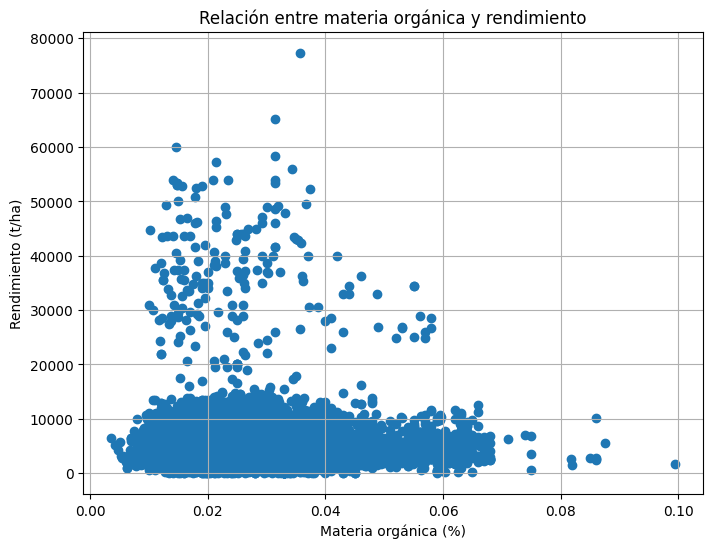

In [41]:
correlacion_rendimiento_mat_org = n_df['rendimiento_sup_cosechada'].corr(n_df['materia_organica_porc'])
correlacion_rendimiento_mat_org


# Print the correlation coefficient
print("Correlación entre rendimiento y materia orgánica:", correlacion_rendimiento_mat_org)

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(n_df['materia_organica_porc'], n_df['rendimiento_sup_cosechada'])
plt.xlabel('Materia orgánica (%)')
plt.ylabel('Rendimiento (t/ha)')
plt.title('Relación entre materia orgánica y rendimiento')
plt.grid(True)

# Show the scatter plot
plt.show()


In [57]:
distribucion_mat_org_por_version_bio = n_df.groupby('version_biotecnologica')['materia_organica_porc'].count().reset_index()
distribucion_mat_org_por_version_bio.sort_values("materia_organica_porc", ascending =  False).head(10)

,version_biotecnologica,materia_organica_porc
19,no bt,1830
36,vt3p,893
2,cl,398
0,bt,275
37,vt3p / rib,275
18,mgrr2,202
34,viptera 3,186
17,mgrr,175
40,vyhr,160
28,sin evento,158


In [58]:
distribucion_mat_org_por_version_bio = n_df.groupby('version_biotecnologica')['materia_organica_porc'].mean().reset_index()
distribucion_mat_org_por_version_bio.sort_values("materia_organica_porc", ascending =  False).head(10)

#enteder q significa

,version_biotecnologica,materia_organica_porc
13,hx,0.039600
2,cl,0.036896
5,cp,0.034809
23,pw enlist ultra,0.034365
11,hclmgrr2,0.031935
4,clvt3p,0.031361
20,otro,0.029927
29,td/tg,0.029861
26,refugio (sin proteina insecticida),0.029242
18,mgrr2,0.028196


In [60]:
numero_empresas_version_bio = n_df['version_biotecnologica'].nunique()
numero_empresas_version_bio

44

In [67]:
explicacion_genetica = n_df.groupby('genetica')['rendimiento_sup_cosechada'].mean().reset_index()
explicacion_genetica.sort_values("rendimiento_sup_cosechada", ascending = False)

,genetica,rendimiento_sup_cosechada
401,pan 5175,52730.000000
370,p 1804,49316.000000
229,duo 30,49165.000000
265,km 4480,42940.000000
358,ns z8,38302.909091
...,...,...
438,srm 553,NaN
467,syn 848,NaN
472,syn 960,NaN
482,tuc 00-19,NaN


In [70]:
relacion_biotecnologia_rendimiento = n_df.groupby('version_biotecnologica')['rendimiento_sup_cosechada'].mean().reset_index()
relacion_biotecnologia_rendimiento.sort_values("rendimiento_sup_cosechada", ascending = False).head(10)

,version_biotecnologica,rendimiento_sup_cosechada
8,gl stack,21194.304938
32,viptera,19866.200000
6,enlist,16114.276123
27,rr,15055.033901
42,yhr,13585.543808
24,pw ultra,12394.691213
10,hclmg,12073.666087
21,pw,11990.097726
43,yr,11597.600000
23,pw enlist ultra,11485.950000


In [75]:
distribucion_fecha_cosecha = n_df['fecha_cosecha'].value_counts().reset_index()
distribucion_fecha_siembra = n_df['fecha_siembra'].value_counts().reset_index()
distribucion_fecha_cosecha
distribucion_fecha_siembra

,fecha_siembra,count
0,2022-06-01,48
1,2021-06-04,40
2,2019-06-10,38
3,2020-06-12,34
4,2022-06-02,33
...,...,...
1974,2011-10-11,1
1975,2011-09-15,1
1976,2011-10-15,1
1977,2011-10-13,1


In [77]:
afectacion_resiembra_mat_org = n_df.groupby('resiembra')['materia_organica_porc'].mean().reset_index()
afectacion_resiembra_mat_org.sort_values("materia_organica_porc", ascending = False).head(10)


,resiembra,materia_organica_porc
1,si,0.029698
0,no,0.029462


In [78]:
relacion_resiembra_riego = n_df.groupby('riego')['resiembra'].value_counts().reset_index()
relacion_resiembra_riego.sort_values("resiembra", ascending = False).head(10)

,riego,resiembra,count
1,no,si,114
3,si,si,1
0,no,no,5462
2,si,no,231


Correlación entre presipitaciones y materia orgánica: -0.047359194446947035


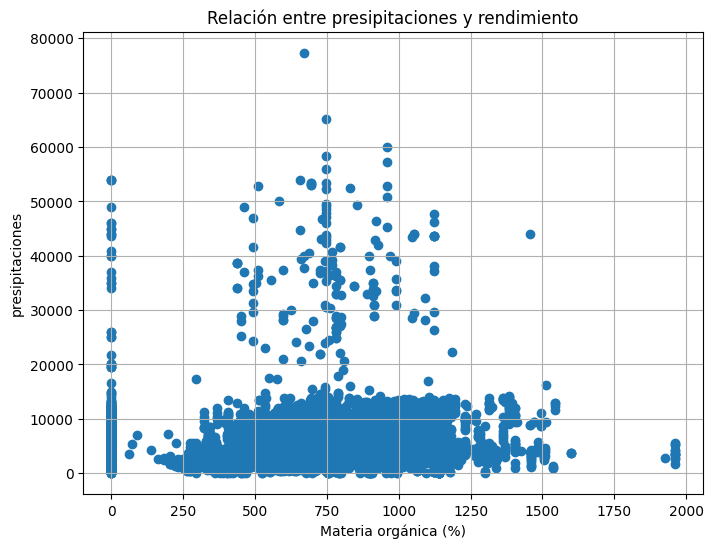

In [80]:
corr_pp_mat_org = n_df['pp'].corr(n_df['materia_organica_porc'])
corr_pp_mat_org


# Print the correlation coefficient
print("Correlación entre presipitaciones y materia orgánica:", corr_pp_mat_org)

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(n_df['pp'], n_df['rendimiento_sup_cosechada'])
plt.xlabel('Materia orgánica (%)')
plt.ylabel('presipitaciones')
plt.title('Relación entre presipitaciones y rendimiento')
plt.grid(True)

# Show the scatter plot
plt.show()